## Settings

In [1]:
reviews_path = 'C:\\Data\\UCL\\@MSc Project - Data and sources\\reviews.csv'

output_path = 'C:\\Data\\UCL\\@MSc Project - Data and Sources\\Images'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from os.path import join
from datetime import datetime

%matplotlib inline

## Load the data

In [3]:
data = pd.read_csv(reviews_path)
data.head()

,id,Company_id,ReviewTitle,Rating,JobTitle,EmployeeRelationship,Contract,Pros,Cons,Year,Month,Day,Company,Sector,ListedOn,Review,ReviewLentgth,Date,Year-Month
0,3947,400,Nice company,5.0,Software Development Engineer,Current Employee,full-time,Good Base salary you can expect herr,Very little stocks compared to faang companies,2020,6,18,Nvidia Corporation,Technology,S&P 500,Good Base salary you can expect herr Very litt...,83,2020-06-18,2020-06-01
1,3948,400,Great benefits,5.0,Senior Software Engineer,Current Employee,full-time,"Great leadership (Jensen Huang, CEO)",Unsure how well that leadership percolates dow...,2020,6,1,Nvidia Corporation,Technology,S&P 500,"Great leadership (Jensen Huang, CEO) Unsure ho...",94,2020-06-01,2020-06-01
2,3949,400,"Great Company, Interesting Work",5.0,Architect,Current Employee,full-time,There are always interesting problems to tackl...,"Sometimes internal tools, flows and infrastruc...",2020,5,28,Nvidia Corporation,Technology,S&P 500,There are always interesting problems to tackl...,377,2020-05-28,2020-05-01
3,3950,400,Experience working in Nvidia,4.0,Senior Software Engineer,Former Employee,full-time,The people around you are very friendly and th...,The procedure of promotion is not clear. It us...,2020,5,28,Nvidia Corporation,Technology,S&P 500,The people around you are very friendly and th...,276,2020-05-28,2020-05-01
4,3951,400,Amazing place to work for mid/late career engi...,5.0,Solutions Architect,Current Employee,full-time,"Endless room to learn, easy to move around, fo...","Must be a self-starter to work here, fast-pace...",2020,5,27,Nvidia Corporation,Technology,S&P 500,"Endless room to learn, easy to move around, fo...",353,2020-05-27,2020-05-01


In [4]:
min_date = datetime.strptime('2018-7-1', '%Y-%m-%d')
max_date = datetime.strptime('2020-6-30', '%Y-%m-%d')
data['Date'] = pd.to_datetime(data.Date)

data = data[(data.Date >= min_date) & (data.Date <= max_date)]

## ==FUNCTIONS==

In [5]:
def get_pivot(data, level, change=True, index=False):
    if index:
        if index not in ['S&P 500', 'FTSE 100', 'EURO STOXX 50']:
            raise ValueError('Invalid index passed in')
        data = data[data.ListedOn == index]
        
    data = pd.DataFrame(
        pd.DataFrame(
            data
            .groupby([level, 'Year-Month'])
            .Rating
            .mean()
        ).to_records()
    )
    
    data_pivot = pd.pivot_table(
        data=data,
        values='Rating',
        columns=level,
        index='Year-Month'
    )
    
    if change:
        data_pivot = data_pivot.rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])
    try:
        data_pivot.drop('None', axis=1, inplace=True)
    except:
        pass
    
    return data_pivot

In [19]:
def plot_correlation(data_pivot, figsize, font_size = 13, output_path=False):
    if type(figsize) != tuple:
        return TypeError('Arg figize must be of type tuple')
    
    corr = data_pivot.corr()
    plt.figure(figsize=figsize)
    
    g = sns.heatmap(
        corr,
        annot=True,
        fmt='.2f',
        annot_kws={'size': font_size},
        cbar=False,
        cmap='coolwarm',
        vmin=-1.0,
        vmax=1.0,
        square=True
    )
    
    g.set(xlabel=None)
    g.set(ylabel=None)

    plt.tight_layout()
    
    if output_path:
        plt.savefig(output_path)

## Analysis for the whole stock world

In [7]:
data_pivot = get_pivot(data, level='Sector')

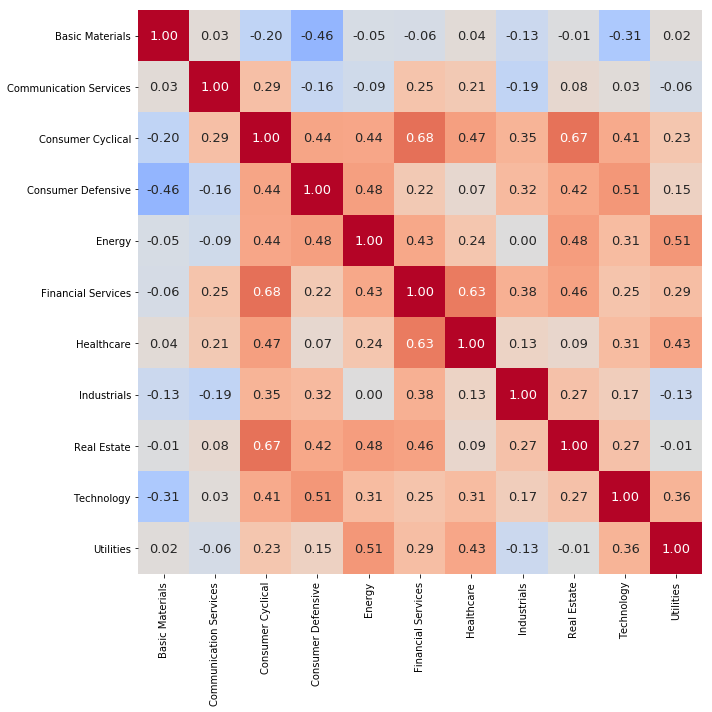

In [8]:
plot_correlation(data_pivot, figsize=(10,10), output_path=join(output_path, 'sentiment_corr.png'))

## Analysis for S&P 500

In [9]:
data_pivot = get_pivot(data, level='Sector', index='S&P 500')

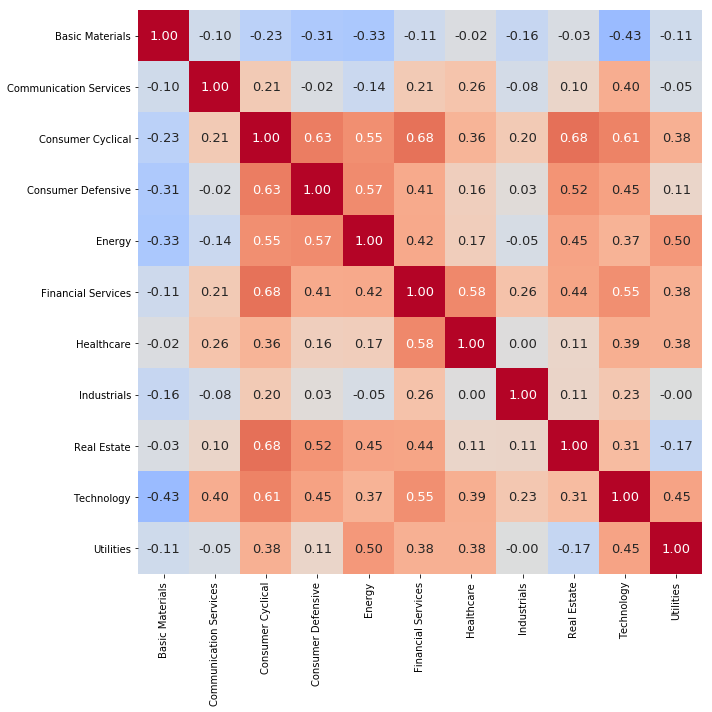

In [10]:
plot_correlation(data_pivot, figsize=(10,10), output_path=join(output_path, 'sentiment_corr_sp.png'))

## Analysis for FTSE 100

In [11]:
data_pivot = get_pivot(data, level='Sector', index='FTSE 100')

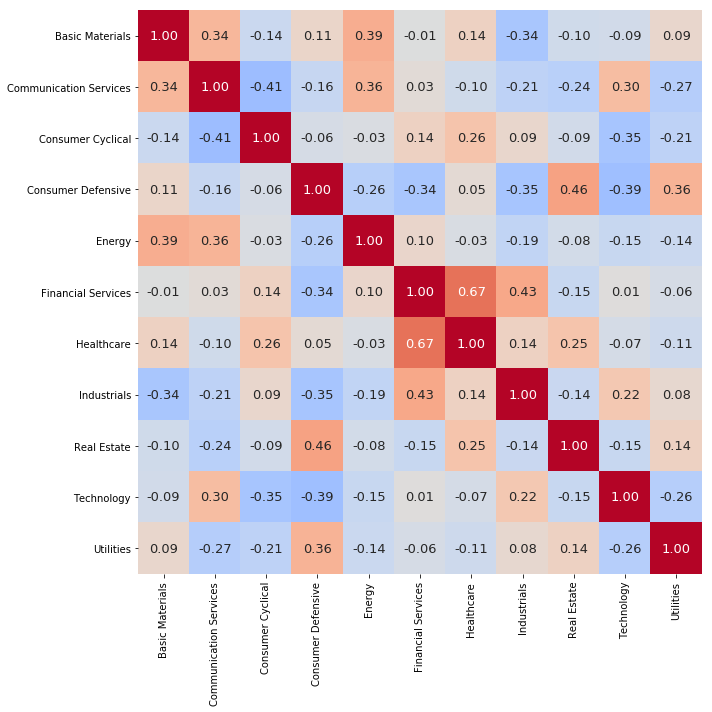

In [12]:
plot_correlation(data_pivot, figsize=(10,10), output_path=join(output_path, 'sentiment_corr_ftse.png'))

## Analysis for EURO STOXX 50

In [13]:
data_pivot = get_pivot(data, level='Sector', index='EURO STOXX 50')

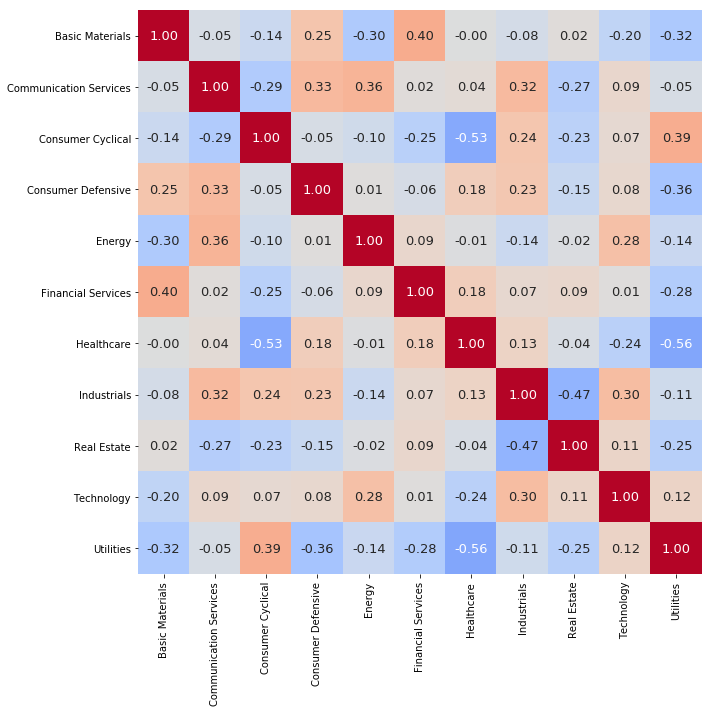

In [14]:
plot_correlation(data_pivot, figsize=(10,10), output_path=join(output_path, 'sentiment_corr_euro.png'))

## Analysis across stock market indices

In [15]:
data_pivot = get_pivot(data, level='ListedOn')

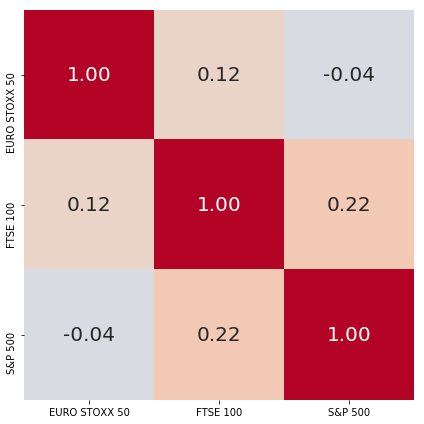

In [22]:
plot_correlation(data_pivot, figsize=(6,6), font_size=20, output_path=join(output_path, 'sentiment_corr_markets.png'))